# Part 4 : Prediction Algorithms

### Linear Regression

In [61]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from datetime import datetime as dt
import calendar as cal

In [62]:
dataset=pd.read_csv('C:\\Users\\DELL\\Desktop\\ADS\\Appliances-energy-prediction-data-master\\energydata_complete.csv',parse_dates=['date'])

In [63]:
dataset.head()

,date,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,...,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
0,2016-01-11 17:00:00,60,30,19.89,47.596667,19.2,44.790000,19.79,44.730000,19.000000,...,17.033333,45.53,6.600000,733.5,92.0,7.000000,63.000000,5.3,13.275433,13.275433
1,2016-01-11 17:10:00,60,30,19.89,46.693333,19.2,44.722500,19.79,44.790000,19.000000,...,17.066667,45.56,6.483333,733.6,92.0,6.666667,59.166667,5.2,18.606195,18.606195
2,2016-01-11 17:20:00,50,30,19.89,46.300000,19.2,44.626667,19.79,44.933333,18.926667,...,17.000000,45.50,6.366667,733.7,92.0,6.333333,55.333333,5.1,28.642668,28.642668
3,2016-01-11 17:30:00,50,40,19.89,46.066667,19.2,44.590000,19.79,45.000000,18.890000,...,17.000000,45.40,6.250000,733.8,92.0,6.000000,51.500000,5.0,45.410389,45.410389
4,2016-01-11 17:40:00,60,40,19.89,46.333333,19.2,44.530000,19.79,45.000000,18.890000,...,17.000000,45.40,6.133333,733.9,92.0,5.666667,47.666667,4.9,10.084097,10.084097


In [64]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19735 entries, 0 to 19734
Data columns (total 29 columns):
date           19735 non-null datetime64[ns]
Appliances     19735 non-null int64
lights         19735 non-null int64
T1             19735 non-null float64
RH_1           19735 non-null float64
T2             19735 non-null float64
RH_2           19735 non-null float64
T3             19735 non-null float64
RH_3           19735 non-null float64
T4             19735 non-null float64
RH_4           19735 non-null float64
T5             19735 non-null float64
RH_5           19735 non-null float64
T6             19735 non-null float64
RH_6           19735 non-null float64
T7             19735 non-null float64
RH_7           19735 non-null float64
T8             19735 non-null float64
RH_8           19735 non-null float64
T9             19735 non-null float64
RH_9           19735 non-null float64
T_out          19735 non-null float64
Press_mm_hg    19735 non-null float64
RH_out        

In [65]:
dataset.describe()

,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,...,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
count,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,...,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000
mean,97.694958,3.801875,21.686571,40.259739,20.341219,40.420420,22.267611,39.242500,20.855335,39.026904,...,19.485828,41.552401,7.411665,755.522602,79.750418,4.039752,38.330834,3.760707,24.988033,24.988033
std,102.524891,7.935988,1.606066,3.979299,2.192974,4.069813,2.006111,3.254576,2.042884,4.341321,...,2.014712,4.151497,5.317409,7.399441,14.901088,2.451221,11.794719,4.194648,14.496634,14.496634
min,10.000000,0.000000,16.790000,27.023333,16.100000,20.463333,17.200000,28.766667,15.100000,27.660000,...,14.890000,29.166667,-5.000000,729.300000,24.000000,0.000000,1.000000,-6.600000,0.005322,0.005322
25%,50.000000,0.000000,20.760000,37.333333,18.790000,37.900000,20.790000,36.900000,19.530000,35.530000,...,18.000000,38.500000,3.666667,750.933333,70.333333,2.000000,29.000000,0.900000,12.497889,12.497889
50%,60.000000,0.000000,21.600000,39.656667,20.000000,40.500000,22.100000,38.530000,20.666667,38.400000,...,19.390000,40.900000,6.916667,756.100000,83.666667,3.666667,40.000000,3.433333,24.897653,24.897653
75%,100.000000,0.000000,22.600000,43.066667,21.500000,43.260000,23.290000,41.760000,22.100000,42.156667,...,20.600000,44.338095,10.408333,760.933333,91.666667,5.500000,40.000000,6.566667,37.583769,37.583769
max,1080.000000,70.000000,26.260000,63.360000,29.856667,56.026667,29.236000,50.163333,26.200000,51.090000,...,24.500000,53.326667,26.100000,772.300000,100.000000,14.000000,66.000000,15.500000,49.996530,49.996530


In [66]:
dataset.columns

Index(['date', 'Appliances', 'lights', 'T1', 'RH_1', 'T2', 'RH_2', 'T3',
       'RH_3', 'T4', 'RH_4', 'T5', 'RH_5', 'T6', 'RH_6', 'T7', 'RH_7', 'T8',
       'RH_8', 'T9', 'RH_9', 'T_out', 'Press_mm_hg', 'RH_out', 'Windspeed',
       'Visibility', 'Tdewpoint', 'rv1', 'rv2'],
      dtype='object')

In [67]:
dataset.dtypes

date           datetime64[ns]
Appliances              int64
lights                  int64
T1                    float64
RH_1                  float64
T2                    float64
RH_2                  float64
T3                    float64
RH_3                  float64
T4                    float64
RH_4                  float64
T5                    float64
RH_5                  float64
T6                    float64
RH_6                  float64
T7                    float64
RH_7                  float64
T8                    float64
RH_8                  float64
T9                    float64
RH_9                  float64
T_out                 float64
Press_mm_hg           float64
RH_out                float64
Windspeed             float64
Visibility            float64
Tdewpoint             float64
rv1                   float64
rv2                   float64
dtype: object

In [68]:
dataset['Year'] = pd.DatetimeIndex(dataset['date']).year
dataset['Month'] = pd.DatetimeIndex(dataset['date']).month
dataset['Monthname'] = dataset['date'].dt.month.apply(lambda x : cal.month_name[x])
dataset['Day']=pd.DatetimeIndex(dataset['date']).day
dataset['Hour']=pd.DatetimeIndex(dataset['date']).hour
dataset['Perday']=dataset['date'].dt.date
dataset['Time']=dataset['date'].dt.time
dataset['DayoftheWeek']=dataset['date'].dt.weekday_name
dataset['WeekStatus'] = dataset['date'].dt.dayofweek
dataset['Weekendstatus'] = np.where(dataset['WeekStatus'] < 5, 0, 1)

#To Calculate NSM
datenum=dataset['Perday'].unique()
lennsm = len(datenum)+1
print("len",lennsm)
data=[]
for j in range (1,lennsm):
    if (j==1):
        for i in range (0,42):
            if (i==0):
                a = 61200
                data.append(a)
            elif (i > 0 ):
                a = a + 600
                data.append(a)
    elif (j > 1 ):
        for i in range (0,144):
            if (i==0):
                a = 0
                data.append(a)
            elif (i > 0 ):
                a = a + 600
                data.append(a)
df1 = pd.DataFrame({'data_converted' : data})
dfc1 = df1[:len(dataset)]
dataset['NSM'] = dfc1
###################

len 139


In [69]:
df_day = pd.get_dummies(dataset['DayoftheWeek'])
dataset = dataset.join(df_day)

In [70]:
#Deleting ome of the columns from the dataset as they are not needed pr their purpose is done.

# Monday column is deleted as the result can be derived by the other six columns of the week
del dataset['Monday']

# WeekStatus column is deleted as the column was only made to derive weekend status column
# As we needed the categorical values for weekday and weekend
del dataset['WeekStatus'] 

# DayoftheWeek column is deleted as there are separate columns for each of the weekday
del dataset['DayoftheWeek']
del dataset['Time'] 

# Perday column was deleted as it was only needed for NSM
del dataset['Perday'] 

In [71]:
del dataset['date']
del dataset['rv1']
del dataset['rv2']
del dataset['Monthname']
del dataset['Year']

In [72]:
# Compute the correlation matrix
corr = dataset.corr()

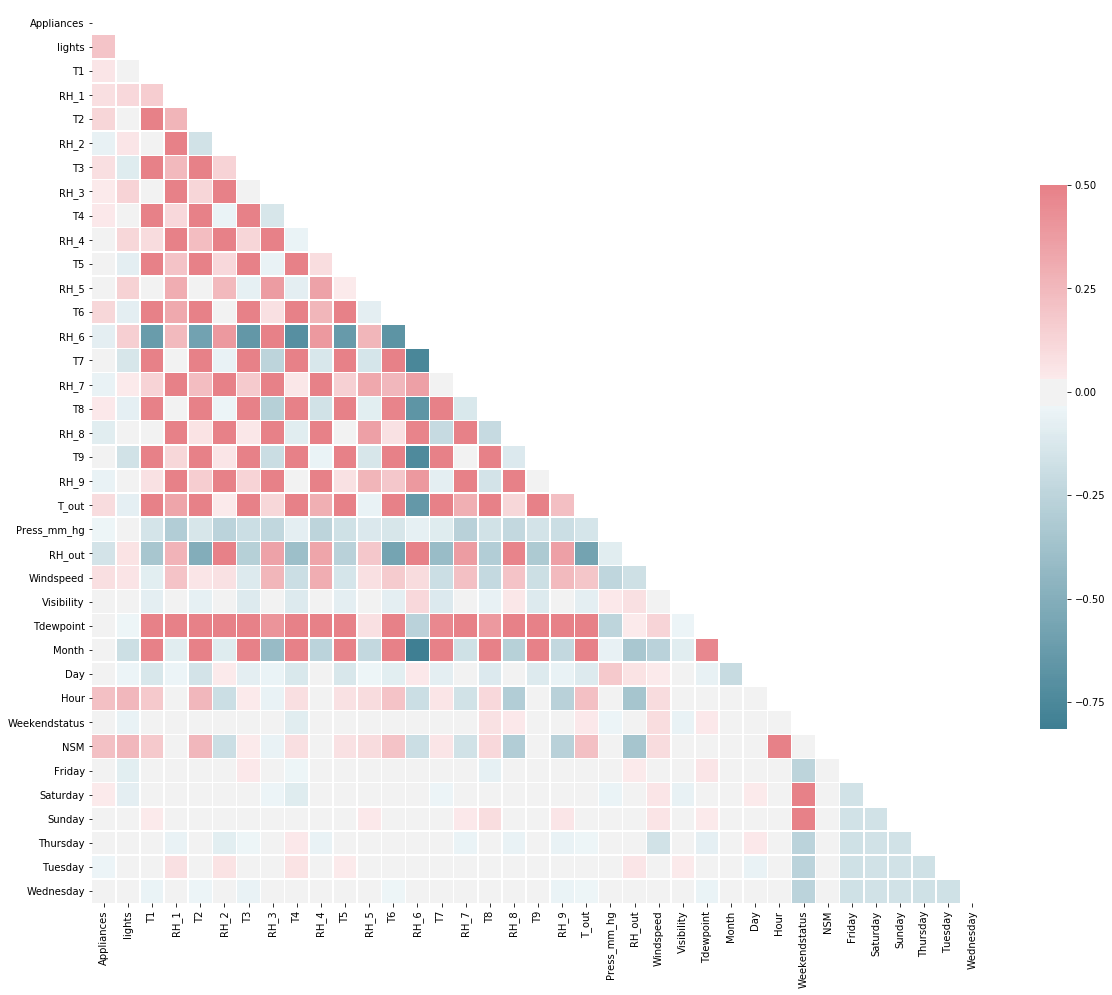

In [73]:
# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(20, 20))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.5, center=0,square=True, linewidths=0.5,cbar_kws={"shrink": .5})

In [74]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19735 entries, 0 to 19734
Data columns (total 37 columns):
Appliances       19735 non-null int64
lights           19735 non-null int64
T1               19735 non-null float64
RH_1             19735 non-null float64
T2               19735 non-null float64
RH_2             19735 non-null float64
T3               19735 non-null float64
RH_3             19735 non-null float64
T4               19735 non-null float64
RH_4             19735 non-null float64
T5               19735 non-null float64
RH_5             19735 non-null float64
T6               19735 non-null float64
RH_6             19735 non-null float64
T7               19735 non-null float64
RH_7             19735 non-null float64
T8               19735 non-null float64
RH_8             19735 non-null float64
T9               19735 non-null float64
RH_9             19735 non-null float64
T_out            19735 non-null float64
Press_mm_hg      19735 non-null float64
RH_out         

In [75]:
dataset.describe()

,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,...,Day,Hour,Weekendstatus,NSM,Friday,Saturday,Sunday,Thursday,Tuesday,Wednesday
count,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,...,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000
mean,97.694958,3.801875,21.686571,40.259739,20.341219,40.420420,22.267611,39.242500,20.855335,39.026904,...,16.057411,11.502002,0.277274,42907.129465,0.144160,0.138637,0.138637,0.145934,0.145934,0.145934
std,102.524891,7.935988,1.606066,3.979299,2.192974,4.069813,2.006111,3.254576,2.042884,4.341321,...,8.450998,6.921953,0.447664,24940.020831,0.351261,0.345576,0.345576,0.353049,0.353049,0.353049
min,10.000000,0.000000,16.790000,27.023333,16.100000,20.463333,17.200000,28.766667,15.100000,27.660000,...,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,50.000000,0.000000,20.760000,37.333333,18.790000,37.900000,20.790000,36.900000,19.530000,35.530000,...,9.000000,6.000000,0.000000,21600.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,60.000000,0.000000,21.600000,39.656667,20.000000,40.500000,22.100000,38.530000,20.666667,38.400000,...,16.000000,12.000000,0.000000,43200.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,100.000000,0.000000,22.600000,43.066667,21.500000,43.260000,23.290000,41.760000,22.100000,42.156667,...,23.000000,17.000000,1.000000,64200.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1080.000000,70.000000,26.260000,63.360000,29.856667,56.026667,29.236000,50.163333,26.200000,51.090000,...,31.000000,23.000000,1.000000,85800.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [76]:
dataset.columns

Index(['Appliances', 'lights', 'T1', 'RH_1', 'T2', 'RH_2', 'T3', 'RH_3', 'T4',
       'RH_4', 'T5', 'RH_5', 'T6', 'RH_6', 'T7', 'RH_7', 'T8', 'RH_8', 'T9',
       'RH_9', 'T_out', 'Press_mm_hg', 'RH_out', 'Windspeed', 'Visibility',
       'Tdewpoint', 'Month', 'Day', 'Hour', 'Weekendstatus', 'NSM', 'Friday',
       'Saturday', 'Sunday', 'Thursday', 'Tuesday', 'Wednesday'],
      dtype='object')

In [77]:
#x Array = Features to train on (Also known as independent or predictor variables)
#y Array = Target Variable (what I am trying to predict. Also known as dependent variables)

In [78]:
dataset.head()

,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,...,Day,Hour,Weekendstatus,NSM,Friday,Saturday,Sunday,Thursday,Tuesday,Wednesday
0,60,30,19.89,47.596667,19.2,44.790000,19.79,44.730000,19.000000,45.566667,...,11,17,0,61200,0,0,0,0,0,0
1,60,30,19.89,46.693333,19.2,44.722500,19.79,44.790000,19.000000,45.992500,...,11,17,0,61800,0,0,0,0,0,0
2,50,30,19.89,46.300000,19.2,44.626667,19.79,44.933333,18.926667,45.890000,...,11,17,0,62400,0,0,0,0,0,0
3,50,40,19.89,46.066667,19.2,44.590000,19.79,45.000000,18.890000,45.723333,...,11,17,0,63000,0,0,0,0,0,0
4,60,40,19.89,46.333333,19.2,44.530000,19.79,45.000000,18.890000,45.530000,...,11,17,0,63600,0,0,0,0,0,0


In [79]:
X=dataset[['lights', 'T1', 'RH_1', 'T2', 'RH_2', 'T3',
       'RH_3', 'T4', 'RH_4', 'T5', 'RH_5', 'T6', 'RH_6', 'T7', 'RH_7', 'T8',
       'RH_8', 'T9', 'RH_9', 'T_out', 'Press_mm_hg', 'RH_out', 'Windspeed',
       'Visibility', 'Tdewpoint', 'Month','Hour','Day','Weekendstatus','NSM',
      'Friday','Saturday','Sunday','Thursday','Tuesday','Wednesday']]

In [80]:
y=dataset['Appliances']

In [81]:
from sklearn.cross_validation import train_test_split

In [82]:
#train_test_split : Basically passing the x and y data and then specifying test size
#Split arrays or matrices into random train and test subsets

In [83]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=2)

# In the above case, the attribue random_state basically refers to the random split of the data between train set and test set.

In [84]:
from sklearn.linear_model import LinearRegression

In [85]:
lm=LinearRegression()

In [86]:
lm.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [87]:
print(lm.intercept_)

-2.8725637530753403


In [88]:
lm.coef_

array([ 1.87163083e+00, -5.63536051e+00,  1.54069958e+01, -1.81293023e+01,
       -1.37455577e+01,  2.52457081e+01,  5.67791133e+00,  5.99931309e-01,
       -1.59492240e+00, -1.63222045e-01,  3.29654692e-03,  7.33789030e+00,
       -7.65859523e-04, -3.22970473e-01, -1.12567166e+00,  8.57809477e+00,
       -4.21535310e+00, -1.02009934e+01, -4.13167482e-01, -7.82511412e+00,
        7.57057328e-02, -1.66094927e-01,  1.40657299e+00,  1.40089497e-01,
        1.99069073e+00, -9.68569290e+00, -4.35478717e+00, -4.92337803e-03,
        1.94381618e+00,  1.46341202e-03,  9.69795297e+00,  1.00938177e+01,
       -8.15000155e+00, -9.82273020e+00, -1.27760765e+01, -1.02777991e+01])

In [89]:
X_train.columns

Index(['lights', 'T1', 'RH_1', 'T2', 'RH_2', 'T3', 'RH_3', 'T4', 'RH_4', 'T5',
       'RH_5', 'T6', 'RH_6', 'T7', 'RH_7', 'T8', 'RH_8', 'T9', 'RH_9', 'T_out',
       'Press_mm_hg', 'RH_out', 'Windspeed', 'Visibility', 'Tdewpoint',
       'Month', 'Hour', 'Day', 'Weekendstatus', 'NSM', 'Friday', 'Saturday',
       'Sunday', 'Thursday', 'Tuesday', 'Wednesday'],
      dtype='object')

In [91]:
cdf=pd.DataFrame(lm.coef_,X.columns,columns=['Coeff'])

In [92]:
cdf

,Coeff
lights,1.871631
T1,-5.635361
RH_1,15.406996
T2,-18.129302
RH_2,-13.745558
T3,25.245708
RH_3,5.677911
T4,0.599931
RH_4,-1.594922
T5,-0.163222


### Predictions

In [ ]:
#def prediction_function(X_test):
#    lm.predict(X_test)

In [93]:
predictions=lm.predict(X_test)

In [94]:
predictions

array([ 67.01676296, 118.64081827, 191.32872947, ...,  76.40320874,
        83.01619812, 125.13111528])

In [95]:
y_test

1117      20
16275    340
13272    180
3160      90
19210     60
8260      40
12299     60
13505     90
12913     70
17788     60
17894     50
7665      70
10165     50
18809     50
8737      60
3164      70
18194     50
14194     60
1469      80
5151      70
6449     250
17791     70
8089      80
2882     140
1861      80
577      100
2848     140
11427     50
8011      20
10639    240
        ... 
18466     40
98        50
14270    120
4151     330
2588      40
2200      90
6416      40
15799    700
11763     60
19390     70
1551      50
6256      50
12670    260
7104      50
16698     70
1482      40
9033     280
2537      40
10583     50
3286      80
15567     90
14253     40
10741     50
1454     100
5080      60
19014    130
9766     110
18200     60
2123      40
16124     50
Name: Appliances, Length: 5921, dtype: int64

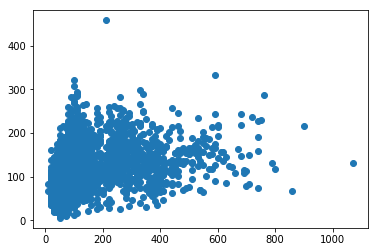

In [96]:
plt.scatter(y_test,predictions)

C:\Users\DELL\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


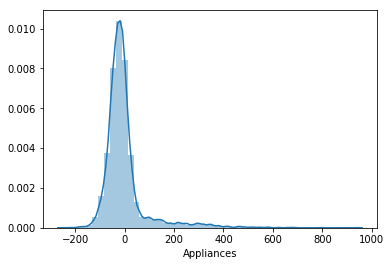

In [97]:
sns.distplot((y_test-predictions),bins=50);

In [98]:
from sklearn import metrics

In [99]:
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))
metrics.r2_score(y_test,predictions)

MAE: 51.96816508992978
MSE: 7951.23190760377
RMSE: 89.16968042784369


0.17518879240933938

# Feature Selection

In [164]:
from mlxtend.feature_selection import SequentialFeatureSelector as SFS

1. Sequential Forward Selection

In [100]:
lm2 = LinearRegression()

In [149]:
sfs = SFS(lm2, 
          forward=True,
          floating=False,
          k_features=25,
          scoring='neg_mean_squared_error',
          cv=0)

sfs.fit(X, y)


SequentialFeatureSelector(clone_estimator=True, cv=0,
             estimator=LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False),
             floating=False, forward=True, k_features=25, n_jobs=1,
             pre_dispatch='2*n_jobs', scoring='neg_mean_squared_error',
             verbose=0)

In [197]:
sfs.subsets_

{1: {'feature_idx': (29,),
  'cv_scores': array([-10015.18211934]),
  'avg_score': -10015.182119337307,
  'feature_names': ('NSM',)},
 2: {'feature_idx': (0, 29),
  'cv_scores': array([-9788.80550078]),
  'avg_score': -9788.805500782733,
  'feature_names': ('lights', 'NSM')},
 3: {'feature_idx': (0, 21, 29),
  'cv_scores': array([-9663.86533144]),
  'avg_score': -9663.865331435616,
  'feature_names': ('lights', 'RH_out', 'NSM')},
 4: {'feature_idx': (0, 2, 21, 29),
  'cv_scores': array([-9553.53086113]),
  'avg_score': -9553.53086113352,
  'feature_names': ('lights', 'RH_1', 'RH_out', 'NSM')},
 5: {'feature_idx': (0, 2, 14, 21, 29),
  'cv_scores': array([-9386.18384126]),
  'avg_score': -9386.183841263808,
  'feature_names': ('lights', 'RH_1', 'RH_7', 'RH_out', 'NSM')},
 6: {'feature_idx': (0, 2, 4, 14, 21, 29),
  'cv_scores': array([-9269.24535133]),
  'avg_score': -9269.245351334503,
  'feature_names': ('lights', 'RH_1', 'RH_2', 'RH_7', 'RH_out', 'NSM')},
 7: {'feature_idx': (0, 2, 4

In [151]:
X2=dataset[['lights',
   'T1',
   'RH_1',
   'T2',
   'RH_2',
   'T3',
   'RH_3',
   'T6',
   'RH_7',
   'T8',
   'RH_8',
   'T9',
   'T_out',
   'RH_out',
   'Windspeed',
   'Visibility',
   'Month',
   'Hour',
   'Weekendstatus',
   'NSM',
   'Friday',
   'Sunday',
   'Thursday',
   'Tuesday',
   'Wednesday']]

In [152]:
y2=dataset['Appliances']

In [153]:
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size=0.3, random_state=2)

In [154]:
lm2.fit(X2_train,y2_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [155]:
print(lm2.intercept_)

19.506763195286894


In [156]:
lm2.coef_

array([ 1.88550442e+00, -5.23868842e+00,  1.54028678e+01, -1.89689011e+01,
       -1.41840631e+01,  2.53004807e+01,  4.93756466e+00,  7.26937464e+00,
       -1.43038190e+00,  8.48663468e+00, -4.42877613e+00, -1.00458553e+01,
       -6.28696884e+00,  1.37978964e-01,  1.24913947e+00,  1.40144524e-01,
       -8.43117256e+00, -4.27531086e+00,  1.18014627e+01,  1.44421051e-03,
        1.02398616e+01, -1.77912528e+01, -9.54204713e+00, -1.21570537e+01,
       -9.37571593e+00])

In [157]:
predictions2=lm2.predict(X2_test)

In [158]:
print('MAE:', metrics.mean_absolute_error(y2_test, predictions2))
print('MSE:', metrics.mean_squared_error(y2_test, predictions2))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y2_test, predictions2)))
metrics.r2_score(y2_test,predictions2)

MAE: 51.9759033708083
MSE: 7944.2471777970295
RMSE: 89.130506437454


0.17591334471689857

2. Sequential Backward Selection

In [165]:
lm3 = LinearRegression()

In [191]:
sbs = SFS(lm3, 
          forward=False,
          floating=False,
          k_features=15,
          scoring='neg_mean_squared_error',
          cv=0)

sbs.fit(X.values, y.values)


SequentialFeatureSelector(clone_estimator=True, cv=0,
             estimator=LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False),
             floating=False, forward=False, k_features=15, n_jobs=1,
             pre_dispatch='2*n_jobs', scoring='neg_mean_squared_error',
             verbose=0)

In [201]:
sbs.k_feature_names_

('0',
 '2',
 '3',
 '4',
 '5',
 '6',
 '11',
 '15',
 '16',
 '17',
 '19',
 '25',
 '29',
 '33',
 '34')

In [202]:
pos = '0',
 '2',
 '3',
 '4',
 '5',
 '6',
 '11',
 '15',
 '16',
 '17',
 '19',
 '25',
 '29',
 '33',
 '34'

colname = X.columns[pos]

IndentationError: unexpected indent (<ipython-input-202-fd5e63ee4980>, line 2)

In [178]:
from mlxtend.feature_selection import ExhaustiveFeatureSelector as EFS

In [183]:


lm4 = LinearRegression()

efs = EFS(lm4, 
          min_features=3,
          max_features=4,
          scoring='neg_mean_squared_error',
          cv=0)

efs.fit(X, y)


Features: 66045/66045

ExhaustiveFeatureSelector(clone_estimator=True, cv=0,
             estimator=LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False),
             max_features=4, min_features=3, n_jobs=1,
             pre_dispatch='2*n_jobs', print_progress=True,
             scoring='neg_mean_squared_error')

In [188]:

print('Best MSE score: %.2f' % (efs.best_score_*-1))


Best MSE score: 9303.12


In [190]:
print('Best subset:', efs.best_idx_,efs.best_feature_names_)

Best subset: (0, 2, 4, 16) ('lights', 'RH_1', 'RH_2', 'RH_8')
